# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 1392s 8us/step


In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

print('x_img_train:',x_img_train.shape)
print('y_label_train:',y_label_train.shape)
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)
print(x_img_test[0])

train: 50000
test : 10000
x_img_train: (50000, 32, 32, 3)
y_label_train: (50000, 1)
x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)
[[[199 215 249]
  [196 211 244]
  [195 210 243]
  ...
  [216 231 250]
  [217 231 250]
  [224 234 252]]

 [[197 210 239]
  [195 208 238]
  [195 210 240]
  ...
  [231 243 250]
  [233 243 250]
  [241 245 253]]

 [[222 226 246]
  [213 220 242]
  [209 219 243]
  ...
  [243 250 251]
  [244 249 251]
  [250 250 253]]

 ...

 [[ 72  73  99]
  [ 71  74 102]
  [ 74  78 108]
  ...
  [220 208 217]
  [183 168 181]
  [155 141 150]]

 [[ 72  75 104]
  [ 76  81 111]
  [ 84  89 122]
  ...
  [222 212 220]
  [187 174 192]
  [145 132 149]]

 [[ 80  85 118]
  [ 84  90 123]
  [ 85  92 127]
  ...
  [217 207 215]
  [207 194 211]
  [176 164 183]]]


In [7]:
print(y_label_train[:5])

[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


ref:  
[CIFAR-10 and CIFAR-100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html)

In [36]:
CIFER_100_Labels = {
    # Superclass: [Classes ...]
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchids', 'poppies', 'roses', 'sunflowers', 'tulips'],
    'food containers': ['bottles', 'bowls', 'cans', 'cups', 'plates'],
    'fruit and vegetables': ['apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'],
    # fix error label: 'computer keyboard' => 'keyboard'
    #'household electrical devices': ['clock', 'computer keyboard', 'lamp', 'telephone', 'television'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple', 'oak', 'palm', 'pine', 'willow'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup truck', 'train'],
    'vehicles 2': ['lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'],
    
    # lawn-mower => lawn_mower
    # maple => maple_tree
    # oak => oak_tree
    # mushrooms => mushroom
    # palm => palm_tree
    # pears => pear
    # pine => pine_tree
    # plates => plate
    # poppies => poppy
    # roses => rose
    # sunflowers => sunflower
    # sweet peppers => sweet pepper
    # tulips => tulip
    # willow => willow_tree
}


# cifar-10
#label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
#            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
# cifar-100
labels = sum(CIFER_100_Labels.values(), [])
labels.sort()

print(labels)

label_dict={k: v for k, v in enumerate(labels)}

print(label_dict)

['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 

In [37]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title='#'+str(i)+','+str(labels[i][0])+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

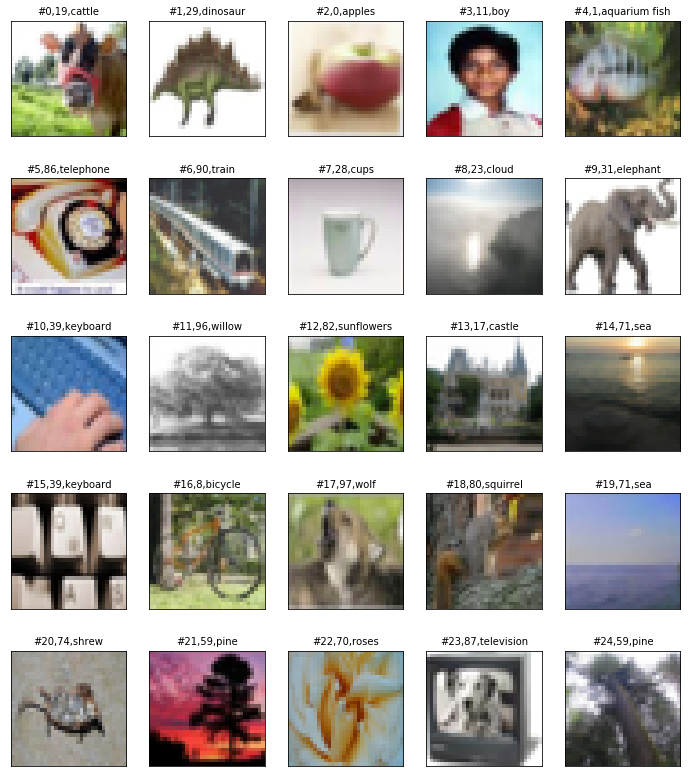

In [39]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0, num=50)

# Image normalize 

In [40]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [41]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [42]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [43]:
print('y_label_train:',y_label_train.shape)

y_label_train: (50000, 1)


In [44]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [45]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [46]:
y_label_train_OneHot.shape

(50000, 100)

In [47]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.